<a href="https://colab.research.google.com/github/joynaomi81/Titanic_Survival_Project/blob/main/Copy_of_Proverb_Dec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary Libraries

In [ ]:
!pip install nltk pandas scikit-learn

In [ ]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Inspection

**Load** **dataset**

In [ ]:
#load dataset
data = pd.read_csv('/content/drive/MyDrive/Proverb_Dec_new -.csv')

In [ ]:
# Check for the first 5 rows
data.head()

,Proverbs,Labels
0,‘‘ Ọ̀ràn yí ò dùn mí’’: ẹ̀ẹ̀kanṣoṣo là ń wí i.,1
1,"‘‘Èmi ló lòní, èmi ló lọ̀la’’ lọmọdé fi ń díg...",1
2,‘‘Mo mỌ̀bàrà mo mỌ̀fún’’ ti kì í j kí àwòko k...,1
3,‘‘N ò lè jẹ ìjẹkújẹ’’ kì í gbé àwùjọ ọ̀pọ̀ èè...,1
4,"‘‘N ò níí fẹ́, n ò níí gbà’’: ibi tó sùn sí l...",1


In [ ]:
# Check for the last five rows
data.tail()

,Proverbs,Labels
10001,"Yóò sanwo, yóò sì tún mú onídùúró t...",0
10002,Yòó tún jẹ́ kí ètò ọrọ̀ ajé orílẹ̀ èdè gbóunjẹ...,0
10003,Yorùbá bọ̀ wọ́n ní ẹni tó gbẹ́lẹ̀ ló sìn...,0
10004,Yòrùbá ní ọ̀nà à ti mọ ẹni tó lọmọ láye...,0
10005,Yọyọ lẹnu ayé ń dà.,1


In [ ]:
data.columns

Index(['Proverbs', 'Labels'], dtype='object')

In [ ]:
data.info() # information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10006 entries, 0 to 10005
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Proverbs  10006 non-null  object
 1   Labels    10006 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.5+ KB


**Descriptive statistics of the dataset**

In [ ]:
data.describe()

,Labels
count,10006.000000
mean,0.499900
std,0.500025
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


**Shape** **of** **the** **dataset**

In [ ]:
data.shape

(10006, 2)

Check for missing values using isnull()

In [ ]:
data.isnull().sum()

,0
Proverbs,0
Labels,0


There are no missing values in both Proverbs and labels columns.

In [ ]:
# Checking for duplicate rows in the DataFrame
data.duplicated().sum()

53

There are 53 rows in the DataFrame that are duplicates of other rows.

In [ ]:
# Drop duplicates rows
data = data.drop_duplicates()


In [ ]:
data.duplicated().sum()

0

In [ ]:
# Check for the new data shape(size of the data)
data.shape

(9953, 2)

In [ ]:
data.dtypes

,0
Proverbs,object
Labels,int64


In [ ]:
# Check for unique values
data['Proverbs'].unique()

array([' ‘‘ Ọ̀ràn yí ò dùn mí’’: ẹ̀ẹ̀kanṣoṣo là ń wí i. ',
       ' ‘‘Èmi ló lòní, èmi ló lọ̀la’’ lọmọdé fi ń dígbèsè.',
       ' ‘‘Mo mỌ̀bàrà mo mỌ̀fún’’ ti kì í j kí àwòko kọ́ ọ̀pẹ́ẹ̀rẹ́ nÍfá. ',
       ...,
       'Yorùbá bọ̀ wọ́n ní ẹni tó gbẹ́lẹ̀ ló sìnkú, ariwo lásán ni ẹlẹ́kún ń sun.',
       'Yòrùbá ní ọ̀nà à ti mọ ẹni tó lọmọ láyé àtijọ́.',
       'Yọyọ lẹnu ayé ń dà. '], dtype=object)

In [ ]:
# Check for unique values in the label column
data['Labels'].unique()

array([1, 0])

* 1 = Proverb
* 0 = Non_Proverbs

In [ ]:
data['Labels'].value_counts()

,count
Labels,
1,4991
0,4962


* There are 4991 proverbs in the label column and 4962 non proverbs.

## Bar Plot

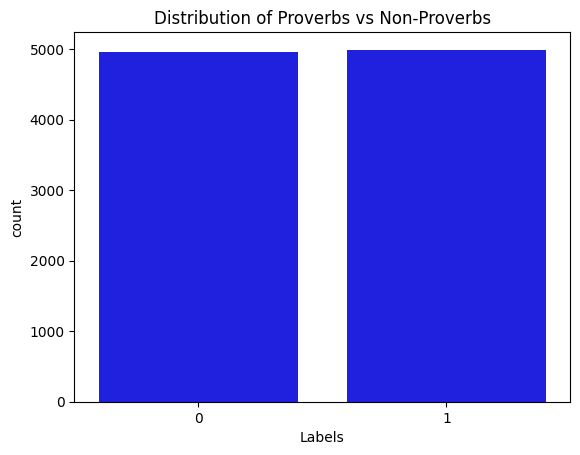

In [ ]:
# Check for distribution of proverbs and non-proverbs
sns.countplot(x='Labels', data=data, color='blue')
plt.title('Distribution of Proverbs vs Non-Proverbs')
plt.show()

## Pie Chart Plot

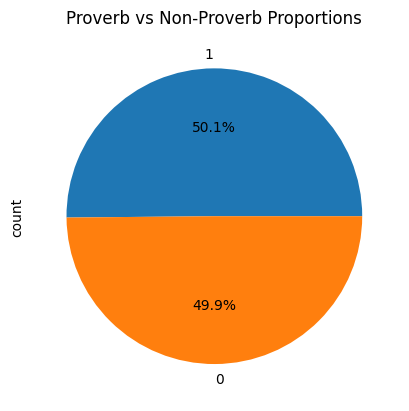

In [ ]:
# Distribution between Proverbs and Non-Proverbs using Pie Chart
data['Labels'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.title('Proverb vs Non-Proverb Proportions')
plt.show()


## Data Preprocessing

Text Normalization

* Lowering text.
* Tokenization .
* Stemming.
* Removal of stopwords.
* Removal of punctuation.

Vectorization
TF_IDF



## Text Normalization

In [ ]:
data['clean_text'] = data['Proverbs'].str.lower() # Lowercase
data.sample(5)

,Proverbs,Labels,clean_text
9201,Òwò oyin jẹ́ òwò tó lówó lórí púpọ̀ ...,0,òwò oyin jẹ́ òwò tó lówó lórí púpọ̀ ...
9400,Sanwó-Olú ri pé iṣẹ́ lóri ọkọ̀ ojú-irin k...,0,sanwó-olú ri pé iṣẹ́ lóri ọkọ̀ ojú-irin k...
9906,Wọ́n rí ọ̀pọ̀lọpọ̀ àpá lára òkú Lọlá.,0,wọ́n rí ọ̀pọ̀lọpọ̀ àpá lára òkú lọlá.
9745,Wo ọ̀rọ̀ kékeré tó dá awuyewuye sílẹ láàárìn à...,0,wo ọ̀rọ̀ kékeré tó dá awuyewuye sílẹ láàárìn à...
1083,Àgbà kì í ṣorò bí èwe.,1,àgbà kì í ṣorò bí èwe.


In [ ]:
def remove_punctuations(text):
  punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''     # Removal of punctuation.
  for x in text:
    if x in punctuations:
      text = text.replace(x, "")
  return text

In [ ]:
data['clean_text'] = data['Proverbs'].apply(remove_punctuations)
data.head()

,Proverbs,Labels,clean_text
0,‘‘ Ọ̀ràn yí ò dùn mí’’: ẹ̀ẹ̀kanṣoṣo là ń wí i.,1,‘‘ Ọ̀ràn yí ò dùn mí’’ ẹ̀ẹ̀kanṣoṣo là ń wí i
1,"‘‘Èmi ló lòní, èmi ló lọ̀la’’ lọmọdé fi ń díg...",1,‘‘Èmi ló lòní èmi ló lọ̀la’’ lọmọdé fi ń dígbèsè
2,‘‘Mo mỌ̀bàrà mo mỌ̀fún’’ ti kì í j kí àwòko k...,1,‘‘Mo mỌ̀bàrà mo mỌ̀fún’’ ti kì í j kí àwòko k...
3,‘‘N ò lè jẹ ìjẹkújẹ’’ kì í gbé àwùjọ ọ̀pọ̀ èè...,1,‘‘N ò lè jẹ ìjẹkújẹ’’ kì í gbé àwùjọ ọ̀pọ̀ èè...
4,"‘‘N ò níí fẹ́, n ò níí gbà’’: ibi tó sùn sí l...",1,‘‘N ò níí fẹ́ n ò níí gbà’’ ibi tó sùn sí lán...


* URL removal
* HTML tag removal
* Tokenization
* Stopword removal
* Stemming

In [ ]:
import re
from nltk.stem import PorterStemmer

# Custom Yoruba stopword list
yoruba_stopwords = ['ó', 'ní', 'ṣe', 'rẹ̀', 'tí', 'àwọn', 'sí', 'ni', 'náà',
                    'láti', 'kan', 'ti', 'ń', 'lọ', 'o', 'bí', 'padà', 'sì',
                    'wá', 'lè', 'wà', 'kí', 'púpọ̀', 'mi', 'wọ́n', 'pẹ̀lú',
                    'a', 'ṣùgbọ́n', 'fún', 'jẹ́', 'fẹ́', 'kò', 'jù', 'pé',
                    'é', 'gbogbo', 'inú', 'bẹ̀rẹ̀', 'jẹ', 'nítorí', 'nǹkan',
                    'sínú', 'yìí', 'ṣé', 'àti', 'í', 'máa', 'nígbà', 'mo',
                    'an', 'mọ̀', 'bá', 'kì', 'ńlá', 'ọ̀pọ̀lọpọ̀', 'ẹmọ́',
                    'wọn', 'òun']

stop_words = list(yoruba_stopwords)

# Initialize the stemmer
stemmer = PorterStemmer()

# Define function to remove URLs, HTML tags, stopwords, and apply stemming
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Tokenize the text
    words = re.findall(r'\b\w+\b', text) # The text is tokenized, meaning it is splited into individual words using a regular expression.

    # Remove stopwords and apply stemming
    filtered_and_stemmed_words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]

    # Join the filtered and stemmed words back into a sentence
    return ' '.join(filtered_and_stemmed_words)

# Apply the clean_text function to each row in the 'Proverbs' column
data['clean_text'] = data['Proverbs'].apply(clean_text)

data.head()


,Proverbs,Labels,clean_text
0,‘‘ Ọ̀ràn yí ò dùn mí’’: ẹ̀ẹ̀kanṣoṣo là ń wí i.,1,ọ ràn yí ò dùn mí ẹ ẹ kanṣoṣo là wí i
1,"‘‘Èmi ló lòní, èmi ló lọ̀la’’ lọmọdé fi ń díg...",1,èmi ló lòní èmi ló la lọmọdé fi dígbèsè
2,‘‘Mo mỌ̀bàrà mo mỌ̀fún’’ ti kì í j kí àwòko k...,1,mọ bàrà mọ j àwòko kọ ọ pẹ ẹ rẹ nífá
3,‘‘N ò lè jẹ ìjẹkújẹ’’ kì í gbé àwùjọ ọ̀pọ̀ èè...,1,n ò ìjẹkújẹ gbé àwùjọ ọ pọ èèyàn
4,"‘‘N ò níí fẹ́, n ò níí gbà’’: ibi tó sùn sí l...",1,n ò níí fẹ n ò níí gbà ibi tó sùn lánàá níí sù...


In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Function to tokenize the cleaned text
def tokenize_clean_text(text):
    # Tokenize the cleaned text
    tokens = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    return tokens

# Apply the tokenize_clean_text function to the 'clean_text' column
data['tokens'] = data['clean_text'].apply(tokenize_clean_text)

# Output the dataset with tokens
print(data[['clean_text', 'tokens']])


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


                                              clean_text  \
0                  ọ ràn yí ò dùn mí ẹ ẹ kanṣoṣo là wí i   
1                èmi ló lòní èmi ló la lọmọdé fi dígbèsè   
2                   mọ bàrà mọ j àwòko kọ ọ pẹ ẹ rẹ nífá   
3                       n ò ìjẹkújẹ gbé àwùjọ ọ pọ èèyàn   
4      n ò níí fẹ n ò níí gbà ibi tó sùn lánàá níí sù...   
...                                                  ...   
10001  yo sanwo yo si tu n mu oni du u ro ile ẹjọ be ...   
10002  yòó tún ètò ọrọ ajé orílẹ èdè gbóunjẹ fẹ gbẹ g...   
10003  yoru ba bọ wọ n ẹni to gbẹ lẹ lo si nku ariwo ...   
10004            yo ru ba ọ na mọ ẹni tó lọmọ la ye tijọ   
10005                                   yọyọ lẹnu ayé dà   

                                            tokens  
0      [input_ids, token_type_ids, attention_mask]  
1      [input_ids, token_type_ids, attention_mask]  
2      [input_ids, token_type_ids, attention_mask]  
3      [input_ids, token_type_ids, attention_mask]  
4      [input_

In [ ]:
# Create a new DataFrame to keep cleaned text and labels
final_data = data[['clean_text', 'Labels']].copy()

# save the new dataset
final_data.to_csv('cleaned_proverbs_with_labels.csv', index=False)

# Output
print(data[['clean_text', 'Labels']])  # print the  cleaned text and labels

                                              clean_text  Labels
0                  ọ ràn yí ò dùn mí ẹ ẹ kanṣoṣo là wí i       1
1                èmi ló lòní èmi ló la lọmọdé fi dígbèsè       1
2                   mọ bàrà mọ j àwòko kọ ọ pẹ ẹ rẹ nífá       1
3                       n ò ìjẹkújẹ gbé àwùjọ ọ pọ èèyàn       1
4      n ò níí fẹ n ò níí gbà ibi tó sùn lánàá níí sù...       1
...                                                  ...     ...
10001  yo sanwo yo si tu n mu oni du u ro ile ẹjọ be ...       0
10002  yòó tún ètò ọrọ ajé orílẹ èdè gbóunjẹ fẹ gbẹ g...       0
10003  yoru ba bọ wọ n ẹni to gbẹ lẹ lo si nku ariwo ...       0
10004            yo ru ba ọ na mọ ẹni tó lọmọ la ye tijọ       0
10005                                   yọyọ lẹnu ayé dà       1

[9953 rows x 2 columns]


In [ ]:
# save token
data['tokens'] = data['tokens'].apply(lambda x: x['input_ids'].tolist())

# Save the token to a JSON file
data.to_json('tokenized_data.json', orient='records', lines=True)


In [ ]:
data.columns # new column

Index(['Proverbs', 'Labels', 'clean_text', 'tokens'], dtype='object')

In [ ]:
df = pd.read_csv('/content/cleaned_proverbs_with_labels.csv') # load the new dataset

In [ ]:
df.head()

,clean_text,Labels
0,ọ ràn yí ò dùn mí ẹ ẹ kanṣoṣo là wí i,1
1,èmi ló lòní èmi ló la lọmọdé fi dígbèsè,1
2,mọ bàrà mọ j àwòko kọ ọ pẹ ẹ rẹ nífá,1
3,n ò ìjẹkújẹ gbé àwùjọ ọ pọ èèyàn,1
4,n ò níí fẹ n ò níí gbà ibi tó sùn lánàá níí sù...,1


In [ ]:
X = df['clean_text']  # Features
y = df['Labels']  # Labels
# The clean_text represent the proverbs

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned text data
X_tfidf = tfidf_vectorizer.fit_transform(X)


In [ ]:
# Convert the TF-IDF sparse matrix to a dense format
X_tfidf_dense = X_tfidf.toarray()

# Create a DataFrame with the feature names (terms)
tfidf_df = pd.DataFrame(X_tfidf_dense, columns=tfidf_vectorizer.get_feature_names_out())

# Display the DataFrame
print(tfidf_df)


      1466   38  427  4388  4438   7c   aa  aago  aaka   ab  ...  ọwá  ọwọ  \
0      0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  ...  0.0  0.0   
1      0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  ...  0.0  0.0   
2      0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  ...  0.0  0.0   
3      0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  ...  0.0  0.0   
4      0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  ...  0.0  0.0   
...    ...  ...  ...   ...   ...  ...  ...   ...   ...  ...  ...  ...  ...   
9948   0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  ...  0.0  0.0   
9949   0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  ...  0.0  0.0   
9950   0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  ...  0.0  0.0   
9951   0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  ...  0.0  0.0   
9952   0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  ...  0.0  0.0   

      ọya  ọyo  ọyu  ọyàn  ọyẹ  ọṣun  ọṣẹ   ọọ  
0     0.0  0.0

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Accuracy: 0.9578101456554495
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       979
           1       0.95      0.97      0.96      1012

    accuracy                           0.96      1991
   macro avg       0.96      0.96      0.96      1991
weighted avg       0.96      0.96      0.96      1991



In [ ]:
from sklearn.metrics import confusion_matrix  # Import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[930  49]
 [ 35 977]]


* True Positives (TP):  The model correctly predicted 977 proverbs.

* True Negatives (TN): 930 The model correctly predicted 930 non-proverbs.

* False Positives (FP):The model incorrectly predicted 49 proverbs as non-proverbs.

* False Negatives (FN):  The model incorrectly predicted 35 non-proverbs as proverbs.

In [ ]:
# Make predictions on the test set
test_predictions = nb_classifier.predict(X_test)

# Output the predictions along with the actual labels
for actual, predicted in zip(y_test, test_predictions):
    print(f'Actual Label: {actual} - Predicted Label: {predicted}')


Actual Label: 0 - Predicted Label: 0
Actual Label: 1 - Predicted Label: 1
Actual Label: 0 - Predicted Label: 0
Actual Label: 1 - Predicted Label: 1
Actual Label: 0 - Predicted Label: 0
Actual Label: 1 - Predicted Label: 1
Actual Label: 1 - Predicted Label: 1
Actual Label: 0 - Predicted Label: 0
Actual Label: 0 - Predicted Label: 0
Actual Label: 0 - Predicted Label: 1
Actual Label: 0 - Predicted Label: 0
Actual Label: 0 - Predicted Label: 0
Actual Label: 0 - Predicted Label: 0
Actual Label: 0 - Predicted Label: 0
Actual Label: 1 - Predicted Label: 1
Actual Label: 1 - Predicted Label: 1
Actual Label: 1 - Predicted Label: 1
Actual Label: 1 - Predicted Label: 1
Actual Label: 0 - Predicted Label: 0
Actual Label: 0 - Predicted Label: 0
Actual Label: 0 - Predicted Label: 0
Actual Label: 1 - Predicted Label: 1
Actual Label: 1 - Predicted Label: 1
Actual Label: 1 - Predicted Label: 1
Actual Label: 1 - Predicted Label: 1
Actual Label: 0 - Predicted Label: 0
Actual Label: 1 - Predicted Label: 1
A

In [ ]:
# Example new data
new_data = ["À ń pe gbẹ́nàgbẹ́nà ẹyẹ àkókó ń yọjú"]

# Transform the new data using the same TF-IDF vectorizer
new_data_tfidf = tfidf_vectorizer.transform(new_data)

# Make predictions on the new data
new_predictions = nb_classifier.predict(new_data_tfidf)

# Output the predictions along with the text
for text, predicted_label in zip(new_data, new_predictions):
    print(f'Text: "{text}" - Predicted Label: {predicted_label}')


Text: "À ń pe gbẹ́nàgbẹ́nà ẹyẹ àkókó ń yọjú" - Predicted Label: 1


In [ ]:
true_labels = ["proverb"]

for text, actual, predicted in zip(new_data, true_labels, new_predictions):
    print(f'Text: "{text}" - Actual Label: {actual} - Predicted Label: {predicted}')

Text: "À ń pe gbẹ́nàgbẹ́nà ẹyẹ àkókó ń yọjú" - Actual Label: proverb - Predicted Label: 1


In [ ]:
import joblib

# Save the trained Naive Bayes classifier and the TF-IDF vectorizer
joblib.dump(nb_classifier, 'naive_bayes_classifier.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']